In [1]:
import numpy as np
import pandas as pd
import os
import re
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [2]:
path_ref = '..\\data\\refinitiv'

In [3]:
df_sample = pd.read_excel(os.path.join(path_ref,'sample.xlsx'))
df_sentiment = pd.read_csv('sentiment_scores.csv') #drop h&m and dhl
df_similarity = pd.read_csv('similarity_overall.csv')
df_verification = pd.read_csv('verification_scores.csv')

In [4]:
df_sample[df_sample['company'] == 'rio-tinto']

,company,resource use,emissions,environmental innovation,strategy
49,rio-tinto,79.17,83.26,50.35,88.54


In [5]:
df_similarity[df_similarity['company'] == 'rio-tinto']

,company,dissimilarity_total,dissimilarity_total_lim,dissimilarity_average_cluster,dissimilarity_waverage_cluster,dissimilarity_wsum_cluster,dissimilarity_average_cluster_lim,dissimilarity_waverage_cluster_lim,dissimilarity_wsum_cluster_lim
44,rio-tinto,0.555139,0.627738,0.826643,0.716184,0.615135,0.78986,0.673234,0.534635


In [6]:
df_sample

,company,resource use,emissions,environmental innovation,strategy
0,abb,62.39,99.39,36.68,62.18
1,adidas,82.77,90.63,80.68,76.89
2,airbus,99.43,97.09,95.92,83.49
3,apple,98.51,97.50,43.51,87.06
4,bayer,70.38,87.91,82.94,95.75
...,...,...,...,...,...
59,veolia,74.49,79.00,84.15,69.16
60,volkswagen,97.25,96.49,92.69,96.07
61,volvo,96.45,88.41,95.18,87.55
62,walmart,77.73,88.08,76.81,87.01


In [8]:
df_sentiment['final_score'] = MinMaxScaler().fit_transform(np.array(df_sentiment['final_score']).reshape(-1,1))

### Preparing the Refinitiv data

In [7]:
df_sample['average_practice'] = df_sample[['resource use', 'emissions', 'environmental innovation']].replace(0, np.nan).mean(axis = 1)

In [8]:
df_sample['green_practice'] = StandardScaler().fit_transform(np.array(df_sample['average_practice']).reshape(-1,1))
df_sample['green_communication'] = StandardScaler().fit_transform(np.array(df_sample['strategy']).reshape(-1,1))
df_sample['discrepancy_index'] = df_sample['green_communication']-df_sample['green_practice']

In [9]:
df_sample['discrepancy_index'] = MinMaxScaler().fit_transform(np.array(df_sample['discrepancy_index']).reshape(-1,1))

In [10]:
df_sample

,company,resource use,emissions,environmental innovation,strategy,average_practice,green_practice,green_communication,discrepancy_index
0,abb,62.39,99.39,36.68,62.18,66.153333,-1.251297,-1.692492,0.481721
1,adidas,82.77,90.63,80.68,76.89,84.693333,0.283825,-0.653553,0.414026
2,airbus,99.43,97.09,95.92,83.49,97.480000,1.342568,-0.187407,0.333176
3,apple,98.51,97.50,43.51,87.06,79.840000,-0.118034,0.064735,0.566850
4,bayer,70.38,87.91,82.94,95.75,80.410000,-0.070838,0.678493,0.644148
...,...,...,...,...,...,...,...,...,...
59,veolia,74.49,79.00,84.15,69.16,79.213333,-0.169922,-1.199508,0.401446
60,volkswagen,97.25,96.49,92.69,96.07,95.476667,1.176690,0.701094,0.477028
61,volvo,96.45,88.41,95.18,87.55,93.346667,1.000325,0.099343,0.418991
62,walmart,77.73,88.08,76.81,87.01,80.873333,-0.032473,0.061204,0.554695


In [19]:
df_linreg = df_sample[['company','discrepancy_index']]
df_linreg

,company,discrepancy_index
0,abb,0.481721
1,adidas,0.414026
2,airbus,0.333176
3,apple,0.566850
4,bayer,0.644148
...,...,...
59,veolia,0.401446
60,volkswagen,0.477028
61,volvo,0.418991
62,walmart,0.554695


In [20]:
df_linreg = pd.merge(df_linreg, df_similarity, how = 'left')
df_linreg = pd.merge(df_linreg, df_sentiment)
df_linreg = pd.merge(df_linreg, df_verification)
df_linreg

,company,discrepancy_index,dissimilarity_total,dissimilarity_total_lim,dissimilarity_average_cluster,dissimilarity_waverage_cluster,dissimilarity_wsum_cluster,dissimilarity_average_cluster_lim,dissimilarity_waverage_cluster_lim,dissimilarity_wsum_cluster_lim,...,sentiment_overall_lim,clim_sentiment_overall_lim,clim_sentiment_cluster_average_lim,clim_sentiment_cluster_waverage_lim,clim_sentiment_cluster_wsum_lim,sentiment_cluster_average_lim,verification_score,verification_score_lim,verification_cluster,verification_cluster_lim
0,abb,0.481721,0.394642,0.395509,0.458221,0.619573,0.462104,0.418272,0.621324,0.451725,...,0.002288,-0.141260,-0.022790,-0.001798,-0.014381,0.024637,0.818533,0.901786,0.944552,0.987343
1,adidas,0.414026,0.669004,0.645366,0.745420,0.371327,0.351877,0.730806,0.330754,0.320529,...,0.214501,-0.304777,-0.207970,-0.030220,-0.211537,0.104891,0.673692,0.793750,0.922131,0.964139
2,airbus,0.333176,0.577540,0.763859,0.904083,0.918818,0.527802,0.740525,0.758115,0.422630,...,-0.048930,-0.246560,0.020253,-0.014188,-0.127690,0.004320,0.461097,0.290323,0.919706,0.929742
3,apple,0.566850,0.446004,0.514624,0.430209,0.949415,0.585078,0.439572,0.818964,0.531965,...,0.134180,-0.002250,0.121607,0.003739,0.033651,0.217470,0.000000,0.039101,0.456722,0.520234
4,bayer,0.644148,0.693892,0.765657,0.851451,0.916687,0.728271,0.727430,0.862092,0.609459,...,-0.174011,-0.410301,-0.346642,-0.035077,-0.315693,-0.156105,0.688004,0.636029,0.914560,0.914560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,veolia,0.401446,0.371148,0.520925,0.460262,0.747798,0.436433,0.321163,0.717563,0.349765,...,0.010622,-0.005208,0.056463,0.004627,0.041646,0.085833,1.000000,1.000000,1.000000,1.000000
59,volkswagen,0.477028,0.671546,0.760529,0.742698,0.784993,0.724128,0.715468,0.724936,0.617212,...,0.041562,-0.094988,-0.110589,-0.007784,-0.062269,0.005641,0.778625,0.744845,0.957234,0.962580
60,volvo,0.418991,0.444000,0.506159,0.525119,0.634637,0.485966,0.468848,0.611082,0.435366,...,-0.002628,-0.066098,-0.054440,-0.000012,-0.000097,0.102913,0.166385,0.000000,0.848840,0.854508
61,walmart,0.554695,0.344035,0.375118,0.356359,0.482016,0.244216,0.282690,0.473241,0.215208,...,0.064169,-0.033170,-0.061344,0.003247,0.025979,-0.049979,1.000000,1.000000,1.000000,1.000000


In [21]:
test = ['hershey', 'general-mills']
df_linreg = df_linreg[-df_linreg['company'].isin(test)]

In [22]:
df_correlation_scores = pd.DataFrame(columns = ['discrepancy_measure', 'correlation', 'p-value'])

In [23]:
from scipy.stats import pearsonr, ttest_1samp

In [24]:
for column in df_linreg.columns[2:]:
    df_linreg[column] = MinMaxScaler().fit_transform(np.array(df_linreg[column]).reshape(-1,1))
    
df_linreg['clim_sentiment_overall']

C:\Users\dathn\AppData\Local\Temp\ipykernel_30368\2092176236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_linreg[column] = MinMaxScaler().fit_transform(np.array(df_linreg[column]).reshape(-1,1))
C:\Users\dathn\AppData\Local\Temp\ipykernel_30368\2092176236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_linreg[column] = MinMaxScaler().fit_transform(np.array(df_linreg[column]).reshape(-1,1))
C:\Users\dathn\AppData\Local\Temp\ipykernel_30368\2092176236.py:2: SettingWithCopyWarning: 
A value is

0     0.487365
1     0.292901
2     0.368725
3     0.804512
4     0.192427
        ...   
58    0.636440
59    0.599609
60    0.584237
61    0.651766
62    0.548187
Name: clim_sentiment_overall, Length: 61, dtype: float64

In [25]:
x = df_linreg['discrepancy_index']
for column in df_linreg.columns[2:]:
    y = df_linreg[column]
    correlation, p_value = pearsonr(x,y)
    temp_df = pd.DataFrame(
        {
            'discrepancy_measure':[column], 
            'correlation':[correlation],
            'p-value':[p_value]
        }
    )
    df_correlation_scores = pd.concat([df_correlation_scores, temp_df], ignore_index = True)
    

In [26]:
df_correlation_scores
# correlation scores when leaving out beiersdorf, hershey and henkel, which are companies for which I also included articles from 2020

,discrepancy_measure,correlation,p-value
0,dissimilarity_total,-0.092513,0.478247
1,dissimilarity_total_lim,-0.189300,0.143976
2,dissimilarity_average_cluster,-0.144941,0.265063
3,dissimilarity_waverage_cluster,-0.187692,0.147477
4,dissimilarity_wsum_cluster,-0.141412,0.276997
5,dissimilarity_average_cluster_lim,-0.100294,0.441860
6,dissimilarity_waverage_cluster_lim,-0.044880,0.731263
7,dissimilarity_wsum_cluster_lim,-0.059595,0.648228
8,sentiment_overall,0.145899,0.261882
9,sentiment_cluster_average,0.059166,0.650596


In [27]:
df_finbert_results = df_correlation_scores.iloc[[8,9,12,13]]
df_finbert_results
print(df_finbert_results.to_latex(index = False, caption = 'Comparison of the Performance of a Domain-Trained (ClimateBERT) and Non-Domain Trained sentiment model (FinBERT)', label = 'tab:sentimentcomparison', header = True, position = 'h'))

\begin{table}[h]
\centering
\caption{Comparison of the Performance of a Domain-Trained (ClimateBERT) and Non-Domain Trained sentiment model (FinBERT)}
\label{tab:sentimentcomparison}
\begin{tabular}{lrr}
\toprule
              discrepancy\_measure &  correlation &  p-value \\
\midrule
                sentiment\_overall &     0.145899 & 0.261882 \\
        sentiment\_cluster\_average &     0.059166 & 0.650596 \\
           clim\_sentiment\_overall &     0.216281 & 0.094103 \\
climate\_sentiment\_cluster\_average &     0.201118 & 0.120133 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\dathn\AppData\Local\Temp\ipykernel_30368\3124484941.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_finbert_results.to_latex(index = False, caption = 'Comparison of the Performance of a Domain-Trained (ClimateBERT) and Non-Domain Trained sentiment model (FinBERT)', label = 'tab:sentimentcomparison', header = True, position = 'h'))


In [17]:
filter_results = []
for measure in df_correlation_scores['discrepancy_measure']:
    if ('_lim' in measure)|('waverage' in measure)|('wsum' in measure):
        filter_results.append(False)
    else:
        filter_results.append(True)
df_results = df_correlation_scores[filter_results]
df_results.reset_index(inplace = True, drop = True)
df_results

,discrepancy_measure,correlation,p-value
0,dissimilarity_total,-0.072638,0.571566
1,dissimilarity_average_cluster,-0.137835,0.281359
2,sentiment_overall,0.095820,0.455040
3,sentiment_cluster_average,0.004660,0.971088
4,clim_sentiment_overall,0.219188,0.084353
5,climate_sentiment_cluster_average,0.184183,0.148449
6,verification_score,-0.004761,0.970458
7,verification_cluster,-0.036839,0.774385


In [18]:
df_results = df_results.iloc[[0,1,4,5,6,7]]
df_results.reset_index(inplace = True, drop = True)

In [19]:
df_results['discrepancy_measure'] = ['Dissimilarity_firm', 'Dissimilarity_firm-topic', 'Sentiment_firm', 'Sentiment_firm-topic', 'Verification_firm', 'Verification_firm-topic']
df_results

C:\Users\dathn\AppData\Local\Temp\ipykernel_3060\1483800314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['discrepancy_measure'] = ['Dissimilarity_firm', 'Dissimilarity_firm-topic', 'Sentiment_firm', 'Sentiment_firm-topic', 'Verification_firm', 'Verification_firm-topic']


,discrepancy_measure,correlation,p-value
0,Dissimilarity_firm,-0.072638,0.571566
1,Dissimilarity_firm-topic,-0.137835,0.281359
2,Sentiment_firm,0.219188,0.084353
3,Sentiment_firm-topic,0.184183,0.148449
4,Verification_firm,-0.004761,0.970458
5,Verification_firm-topic,-0.036839,0.774385


In [65]:
print(df_results.to_latex(index = False, caption = 'Correlation Analysis Results for the Developed Greenwashing Scores on Document and Cluster Level', label = 'tab:correlationresults', header = True, position = 'h'))

\begin{table}[h]
\centering
\caption{Correlation Analysis Results for the Developed Greenwashing Scores on Document and Cluster Level}
\label{tab:correlationresults}
\begin{tabular}{lrr}
\toprule
     discrepancy\_measure &  correlation &  p-value \\
\midrule
      Dissimilarity\_firm &    -0.072638 & 0.571566 \\
Dissimilarity\_firm-topic &    -0.137835 & 0.281359 \\
          Sentiment\_firm &     0.219188 & 0.084353 \\
    Sentiment\_firm-topic &     0.184183 & 0.148449 \\
       Verification\_firm &    -0.004761 & 0.970458 \\
 Verification\_firm-topic &    -0.036839 & 0.774385 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\dathn\AppData\Local\Temp\ipykernel_12268\2245298321.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_results.to_latex(index = False, caption = 'Correlation Analysis Results for the Developed Greenwashing Scores on Document and Cluster Level', label = 'tab:correlationresults', header = True, position = 'h'))


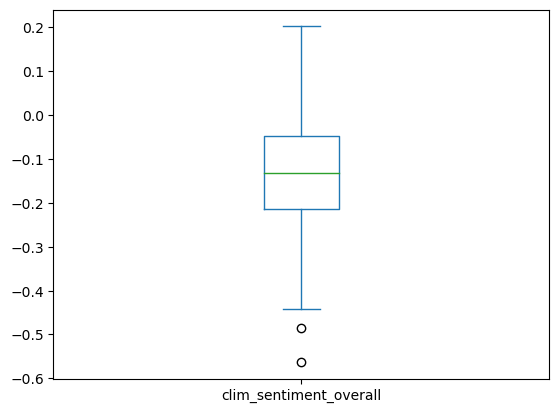

In [22]:
df_sentiment['clim_sentiment_overall'].plot.box()
plt.savefig('boxplot.png')

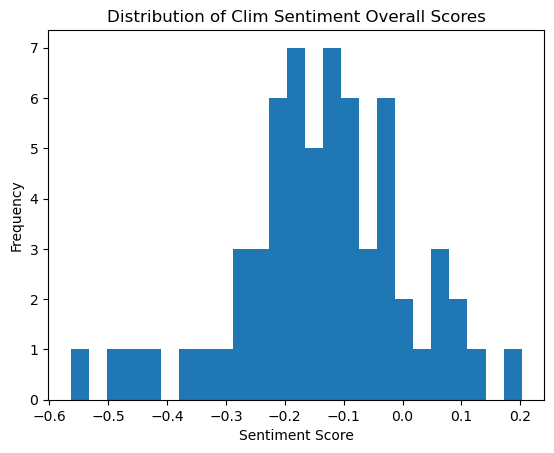

In [28]:
# Assuming your DataFrame is called 'df_sentiment'
df_sentiment['clim_sentiment_overall'].plot.hist(bins = 25)

# Set plot labels
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Clim Sentiment Overall Scores')

plt.savefig('sentimentdistribution.png')
# Show the histogram
plt.show()

In [63]:
df_sentiment['clim_sentiment_overall'].std()

0.1465126715228306

In [66]:
df_results_2 = df_sentiment[df_sentiment['clim_sentiment_overall']>0]
df_results_2 = df_results_2[['company','clim_sentiment_overall']]

In [67]:
print(df_results_2.to_latex(index = False, caption = 'Companies With a Sentiment Discrepancy Above 0', label = 'tab:greenwashcompanies', header = True, position = 'h'))

\begin{table}[h]
\centering
\caption{Companies With a Sentiment Discrepancy Above 0}
\label{tab:greenwashcompanies}
\begin{tabular}{lr}
\toprule
   company &  clim\_sentiment\_overall \\
\midrule
    google &                0.012438 \\
   chevron &                0.107853 \\
     exxon &                0.068282 \\
    danone &                0.126692 \\
 starbucks &                0.086163 \\
ford-motor &                0.055372 \\
     tesco &                0.038179 \\
 blackrock &                0.001474 \\
    dupont &                0.202174 \\
     apple &                0.052469 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\dathn\AppData\Local\Temp\ipykernel_3060\4142593002.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_results_2.to_latex(index = False, caption = 'Companies With a Sentiment Discrepancy Above 0', label = 'tab:greenwashcompanies', header = True, position = 'h'))


In [94]:
df_linreg['clim_sentiment_overall'].mean()

0.5537758492847364

In [17]:
df_linreg['discrepancy_index'] = MinMaxScaler().fit_transform(np.array(df_linreg['discrepancy_index']).reshape(-1,1))

In [18]:
df_linreg.set_index('company', inplace = True)

In [25]:
df_linreg

,ESG governance,Emission Reduction,Waste Management,Renewable Energy,Plastics Recyling,Electrical Vehicles,Climate Change,Nature Conservation,Sustainable Transportation,Sustainable Agriculure,...,5,6,7,8,10,11,20,25,average,dissimilarity
company,,,,,,,,,,,,,,,,,,,,,
rio-tinto,-0.103401,-0.118888,0.315222,-0.076896,0.623388,-0.104418,0.069384,0.360745,-0.046325,NaN,...,0.334281,0.483329,0.232824,0.408051,NaN,0.214380,0.179743,NaN,0.173357,0.826643
walmart,0.007098,0.063356,0.073705,-0.227604,0.030754,-0.283509,0.094747,0.065251,NaN,0.063302,...,0.182003,0.505852,0.475088,NaN,0.468949,0.243316,0.240421,NaN,0.643641,0.356359
colgate,0.114434,0.066575,-0.044937,-0.419891,0.065245,NaN,-0.005104,-0.015416,NaN,-0.323991,...,NaN,0.191898,0.245663,NaN,0.232664,NaN,0.332284,NaN,0.205470,0.794530
general-mills,-0.062815,0.007971,-0.185231,0.031976,-0.213897,NaN,0.264606,-0.249514,-0.884435,-0.139983,...,NaN,0.413579,0.391257,0.144090,0.506694,0.159895,0.554802,NaN,0.317077,0.682923
hp,-0.080099,-0.158046,-0.027431,0.018113,-0.037755,0.125385,0.041401,-0.157452,0.215793,-0.205014,...,0.467884,0.508401,0.404933,0.341146,0.166339,0.363206,0.189046,NaN,0.543057,0.456943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
adidas,-0.003448,0.293583,0.098622,0.148214,-0.018610,-0.129327,0.029701,0.256966,NaN,NaN,...,0.094742,0.376804,0.321279,NaN,NaN,0.212580,0.260169,NaN,0.254580,0.745420
hyundai,0.042043,-0.102316,-0.034380,0.024789,0.216669,0.135543,-0.122541,-0.169336,0.205020,-0.912826,...,0.530615,0.330169,0.299412,0.569242,0.100385,0.275194,NaN,NaN,0.492684,0.507316
intel,0.125090,0.207181,-0.075009,0.134263,0.077224,0.261944,0.305286,0.153274,-0.133883,NaN,...,0.229873,0.454132,0.471610,0.374688,NaN,0.494387,0.330656,NaN,0.624501,0.375499


In [32]:
df_sentiment_total = pd.read_csv('sentiment_overall.csv')
df_sentiment_total[df_sentiment_total['company'] == 'rio-tinto']

,company,value
14,rio-tinto,-0.073053


In [51]:
df_similarity_total = pd.read_csv('similarity_overall.csv')

In [30]:
df_linreg = pd.merge(df_linreg, df_sentiment_total, how = 'left', left_on = df_linreg.index, right_on = 'company')

In [59]:
df_linreg = pd.merge(df_similarity_total, df_sample,  how = 'left')

In [60]:
df_linreg[df_linreg['dissimilarity_total'].isnull()]

,company,sim_score,dissimilarity_total,resource use,emissions,environmental innovation,strategy,average_practice,green_practice,green_communication,discrepancy_index


In [34]:
df_linreg[df_linreg['company'] =='rio-tinto']['discrepancy_index']

0    0.681803
Name: discrepancy_index, dtype: float64

In [64]:
df_linreg

,company,sim_score,dissimilarity_total,resource use,emissions,environmental innovation,strategy,average_practice,green_practice,green_communication,discrepancy_index
0,nextera,0.576124,0.423876,93.43,85.69,63.03,87.01,80.716667,-0.045445,0.061204,0.556465
1,chevron,0.781576,0.218424,74.35,86.22,79.38,93.33,79.983333,-0.106166,0.507573,0.625649
2,ralph-lauren,0.315532,0.684468,86.13,82.59,80.68,92.38,83.133333,0.154656,0.440476,0.580910
3,coca-cola,0.608070,0.391930,72.06,42.13,90.52,99.51,68.236667,-1.078796,0.944055,0.817897
4,mitsubishi,0.029763,0.970237,97.50,67.50,83.33,97.05,82.776667,0.125124,0.770310,0.629939
...,...,...,...,...,...,...,...,...,...,...,...
58,shell,0.481304,0.518696,95.39,97.45,79.38,97.68,90.740000,0.784492,0.814805,0.546050
59,tesla,0.545558,0.454442,56.51,68.65,86.92,78.64,70.693333,-0.875383,-0.529953,0.589042
60,totalenergies,0.305087,0.694913,93.91,98.47,79.38,98.13,90.586667,0.771796,0.846588,0.552119
61,colgate,0.510728,0.489272,99.24,93.57,90.48,97.08,94.430000,1.090026,0.772428,0.498584


In [29]:
df_linreg.index

Index(['rio-tinto', 'walmart', 'colgate', 'general-mills', 'hp', 'shell',
       'p&g', 'exxon', 'komatsu', 'bayer', 'inditex', 'google', 'diageo',
       'ibm', 'mcdonald', 'tesla', 'mercedes', 'toyota', 'sonoco', 'h&m',
       'totalenergies', 'chipotle', 'coca-cola', 'eversource', 'honda',
       'renault', 'citi', 'dell', 'beiersdorf', 'pepsico', 'airbus', 'henkel',
       'mitsubishi', 'ralph-lauren', 'dupont', 'tesco', 'hershey', 'nike',
       'boeing', 'abb', 'cemex', 'blackrock', 'ford-motor', 'danone', 'enel',
       'volvo', 'volkswagen', 'nestle', 'linde', 'edp', 'schneider-electric',
       'apple', 'mondelez', 'microsoft', 'nextera', 'veolia', 'chevron', 'dhl',
       'adidas', 'hyundai', 'intel', 'bmw', 'starbucks'],
      dtype='object', name='company')

In [39]:
X = df_linreg['value']
y = df_linreg['discrepancy_index']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:      discrepancy_index   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.5653
Date:                Tue, 16 May 2023   Prob (F-statistic):              0.455
Time:                        21:24:18   Log-Likelihood:                 19.086
No. Observations:                  63   AIC:                            -34.17
Df Residuals:                      61   BIC:                            -29.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5379      0.023     23.363      0.0

In [65]:
X = df_linreg['dissimilarity_total']
y = df_linreg['discrepancy_index']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:      discrepancy_index   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.5653
Date:                Tue, 16 May 2023   Prob (F-statistic):              0.455
Time:                        22:01:22   Log-Likelihood:                 19.086
No. Observations:                  63   AIC:                            -34.17
Df Residuals:                      61   BIC:                            -29.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5832    